<div style="background-color: #FFD43B; padding: 10px; text-align: center;">
    <h2 style="color:#306998;font-size: 2.3em">Trabajo Práctico Integrador</h2>
    <h2 style="color:#306998;font-size: 1.2em;">Análisis de DataSet sobre precios de autos en el Reino Unido</h2>

> Dataset: https://www.kaggle.com/datasets/muhammadawaistayyab/used-cars-prices-in-uk

+ En este trabajo final se pondrán en práctica los conceptos vistos en el curso de Data Science desde el análisis, depuración y visualización de un DataSet específico hasta una regresión lineal múltiple que permita predecir el target value en cuestion: "Price"

In [1]:
#importo librerias y creo variable del dataset

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

import numpy as np

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

from statsmodels import regression

Prices_dataset=pd.read_csv("used_cars_UK.csv")

In [2]:
Prices_dataset

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,4723,Renault Megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3681,4724,Audi A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3682,4725,BMW 3 Series,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3683,4726,Honda Accord,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


<div style="background-color: #FFD43B;padding: 10px; text-align: center;">
 <h2 style="color:#306998;font-size: 1.7em;">Análisis exploratorio del DataFrame</h2>
 <h2 style="color:#306998;font-size: 1.4em;">Depuración y visualización</h2>

In [3]:
#visualizo los tipos de datos que contiene el dataset

Prices_dataset.dtypes

Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

In [4]:
#visualizo todos los datos discretos del df 

Prices_dataset.describe()

,Unnamed: 0,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,2314.770963,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,1415.821308,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,0.000000,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,1059.000000,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,2279.000000,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,3593.000000,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,4727.000000,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


In [5]:
# elimino feature "unnamed" y"title" para reducir dimensionalidad

Prices_dataset.drop (columns= ["Unnamed: 0"], inplace=True)

Prices_dataset.drop (columns= ["title"], inplace=True)

#renombro los features para que quede prolijo el df

Prices_dataset.rename(columns={'Mileage(miles)': 'Mileage'}, inplace=True)

Prices_dataset.rename(columns={'Registration_year': 'Registration Year'}, inplace=True)

#modifico datos de la columna Engine para que sean valor float eliminando la sigla de litros (L)

Prices_dataset["Engine"] = Prices_dataset["Engine"].str.replace('L', '').astype (float)

In [6]:
#visualizo cantidad de valores NaN que hay en cada uno de los features del dataset

Prices_dataset.isna().sum()

Price                   0
Mileage                 0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

In [7]:
#quiero saber todos los valores que toma la columna "Gearbox" (y no la cantidad de apariciones de cada uno de esos valores) para saber si puedo convertirlos a int.

set(Prices_dataset ["Gearbox"])

{'Automatic', 'Manual'}

In [8]:
#quiero saber todos los valores que toma la columna "Fuel Type" (y no la cantidad de apariciones de cada uno de esos valores) para saber si puedo convertirlos a int.

set(Prices_dataset ["Fuel type"])

{'Diesel',
 'Diesel Hybrid',
 'Electric',
 'Petrol',
 'Petrol Hybrid',
 'Petrol Plug-in Hybrid'}

In [9]:
#quiero saber todos los valores que toma la columna "Body type" (y no la cantidad de apariciones de cada uno de esos valores) para saber si puedo convertirlos a int.

set(Prices_dataset ["Body type"])

{'Combi Van',
 'Convertible',
 'Coupe',
 'Estate',
 'Hatchback',
 'MPV',
 'Minibus',
 'Pickup',
 'SUV',
 'Saloon'}

In [10]:
#quiero saber todos los valores que toma la columna "Emission class" (y no la cantidad de apariciones de cada uno de esos valores) para saber si puedo convertirlos a int.

set(Prices_dataset ["Emission Class"])

{'Euro 1', 'Euro 2', 'Euro 3', 'Euro 4', 'Euro 5', 'Euro 6', nan}

In [11]:
#averiguo cuantos valores posibles tiene el feature service history

set(Prices_dataset ["Service history"])

{'Full', nan}

In [12]:
#al tener solo NaN y full consideré pasar los NaN a 0 asi luego aplico get dummies 

Prices_dataset ["Service history"].fillna(0, inplace=True)

Prices_dataset = pd.get_dummies(Prices_dataset, columns=["Service history"], drop_first=True)

#aplico get dummies a Gearbox al tener dos valores posibles

Prices_dataset = pd.get_dummies(Prices_dataset, columns=["Gearbox"], drop_first=True)

In [13]:
#paso los valores anteriores a int

Prices_dataset ["Service history_Full"] = Prices_dataset ["Service history_Full"].astype(int)

Prices_dataset ["Gearbox_Manual"] = Prices_dataset ["Gearbox_Manual"].astype(int)

#edito los nombres de los features para que quede mas prolijo

Prices_dataset.rename(columns={'Service history_Full': 'Service history Full', "Registration_Year" : "Registration Year", "Gearbox_Manual" : "Gearbox Manual"}, inplace=True)

In [14]:
#aplico funcion describe a feature Seats, Doors, Previos Owners y Engine ya que ambas tienen valores discretos

Prices_dataset[["Doors", "Seats", "Previous Owners", "Engine"]].describe() 

,Doors,Seats,Previous Owners,Engine
count,3660.000000,3650.000000,2276.000000,3640.000000
mean,4.321038,4.900274,2.807557,1.606264
std,0.986902,0.577200,1.546028,0.486718
min,2.000000,2.000000,1.000000,0.800000
25%,3.000000,5.000000,2.000000,1.300000
50%,5.000000,5.000000,3.000000,1.600000
75%,5.000000,5.000000,4.000000,1.900000
max,5.000000,7.000000,9.000000,6.300000


<Axes: ylabel='Previous Owners'>

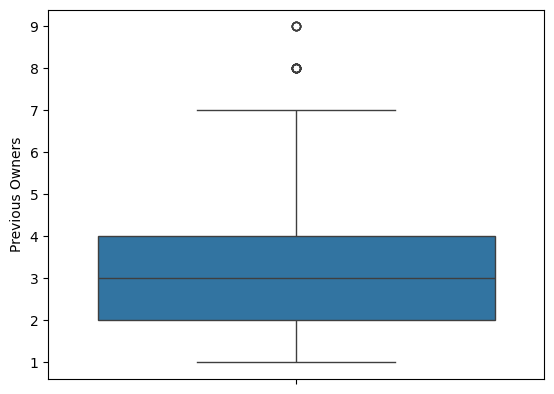

In [15]:
#ejecuto un diagrama de caja para visualizar outliers del feature Previous owners como paso previo para eliminar NaN
sns.boxplot (data=Prices_dataset ["Previous Owners"])
#hay outliers por encima del maximo que es 7

In [16]:
#busco reemplazar los datos NaN con la media de los features ya que no hay valores atipicos.
#Creo variables que calculan la media de los features y les aplico funcion FillNa
#en cuanto a la visualizacion de los datos con describe(), al ser la media valor float  preferí redondear al int mas cercano con la funcion round

mean_doors=Prices_dataset["Doors"].mean().round() 

mean_seats=Prices_dataset["Seats"].mean().round()

#en este caso calculé la mediana al haber valores atípicos.

Prices_dataset ["Doors"].fillna(mean_doors, inplace=True)

owners_median = Prices_dataset ["Previous Owners"].median() 

Prices_dataset ["Seats"].fillna(mean_seats, inplace=True)

Prices_dataset ["Previous Owners"].fillna (owners_median, inplace=True)

#luego busco reemplazar los valores float por int

Prices_dataset["Doors"] = Prices_dataset["Doors"].astype(int)

Prices_dataset["Seats"] = Prices_dataset["Seats"].astype(int)

Prices_dataset["Previous Owners"] = Prices_dataset["Previous Owners"].astype(int)

<Axes: ylabel='Emission Class'>

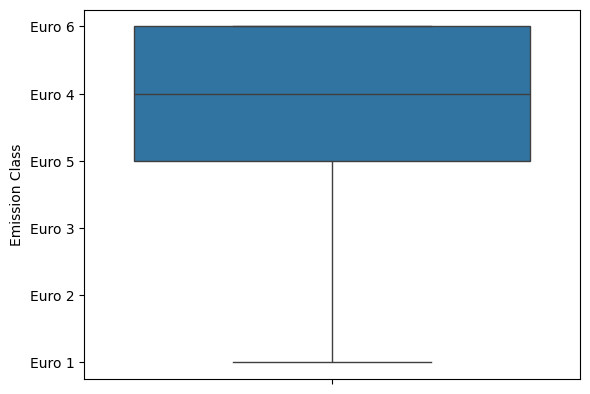

In [17]:
#ejecuto un diagrama de caja para visualizar outliers del feature como paso previo para eliminar NaN

sns.boxplot (data=Prices_dataset ["Emission Class"])

In [18]:
#pase valores str a float para que me permita ejecutar funcion fillNa

Prices_dataset["Emission Class"] = Prices_dataset["Emission Class"].str.replace('Euro', '').astype (float)

In [19]:
#al no tener valores atípicos reemplazo los NaN por la media

mean_emission = Prices_dataset["Emission Class"].mean()

Prices_dataset["Emission Class"].fillna(mean_emission, inplace=True)

#convierto los datos str en int para luego aplicar funcion mean

Prices_dataset["Emission Class"] = Prices_dataset["Emission Class"].astype(int)

<Axes: ylabel='Engine'>

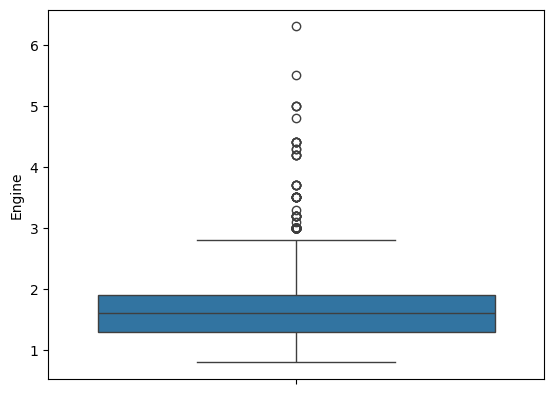

In [20]:
#ejecuto un diagrama de caja para visualizar outliers del feature como paso previo para eliminar NaN

sns.boxplot (data=Prices_dataset ["Engine"])

In [21]:
#reemplazo los datos Nan por la mediana al haber identificado outliers

engine_median = Prices_dataset ["Engine"].median()


Prices_dataset ["Engine"].fillna (engine_median, inplace=True)

<div style="padding: 10px; text-align: center;">
    <h2 style="font-size: 1.4em; text-decoration: underline;">Datos continuos/discretos</h2v>

In [22]:
# creo funcion que me cree un diagrama de dispersion, remarcandome los outliers de la columna para reutilizar en todas las columnas que quiera
def DispersionOutliers (Prices_dataset, columna):
  
    #calculo de cuantiles y umbrales
    Q1 = Prices_dataset[columna].quantile(0.25)
    
    Q3 = Prices_dataset[columna].quantile(0.75)
    
    IQR = Q3 - Q1
    
    umbralSup = Q3 + 1.5 * IQR
    
    umbralInf = Q1 - 1.5 * IQR
    #defino que todos los outliers serán o bien menores al umbral inferior o bien mayores al umbral superior.
    outliers = Prices_dataset[(Prices_dataset[columna] > umbralSup) | (Prices_dataset[columna] < umbralInf)]
  
    plt.scatter(Prices_dataset.index,Prices_dataset[columna], c="skyblue", alpha=0.5, label='Index')
   
#agrego condicion if para el caso del feature mileage que posee un outlier de 1110100 y que sin los parametros que menciono mas abajo, el gráfico tendria referencias con notacion cientifica
    if any(Prices_dataset [columna] > 50000): 
        
        ytick_values = range(50000, 1110100, 50000)
        
        plt.xlabel("Index")
        
        plt.ylabel(columna)
        
        plt.yticks(ytick_values, [str(val) for val in ytick_values])
    
   
    plt.title (columna)
    
    plt.xlabel("Index")
        
    plt.ylabel(columna)

    plt.suptitle ("Vehiculos usados en venta en UK")
    
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    plt.scatter(outliers.index,outliers[columna], c="orange", label='Outliers')
    
    plt.legend()
    
    plt.show()

In [23]:
#creo funciones de Valor Mínimo y Valor Máximo para identificar outliers a lo largo del análisis
def ValorMinimo (Prices_dataset, columna):
    valor_minimo = Prices_dataset[columna].min()
    
    indice_minimo = Prices_dataset[Prices_dataset[columna] == valor_minimo].index.tolist()
    
    print ("El valor minimo es", valor_minimo, "y se encuentra en el indice", indice_minimo)


def ValorMaximo (Prices_dataset, columna):
    valor_maximo = Prices_dataset[columna].max()
    
    indice_maximo = Prices_dataset[Prices_dataset[columna] == valor_maximo].index.tolist()
    
    print ("El valor maximo es", valor_maximo, "y se encuentra en el indice", indice_maximo)


### **Price**

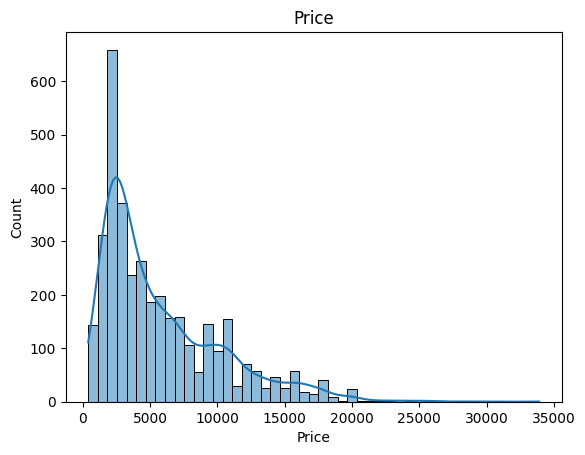

In [24]:
#analizo frecuencia de valores en variable objetivo
sns.histplot(Prices_dataset["Price"], kde=True)

plt.title ("Price")

plt.show()

In [25]:
print ("La mayoria de automoviles se venden a $", Prices_dataset['Price'].mode()[0])

La mayoria de automoviles se venden a $ 2495


+ Podemos identificar una distribucion hacia la izquierda con cola larga hacia la derecha, indicando valores atípicos

+ La mayoria de automóviles se venden a $2495

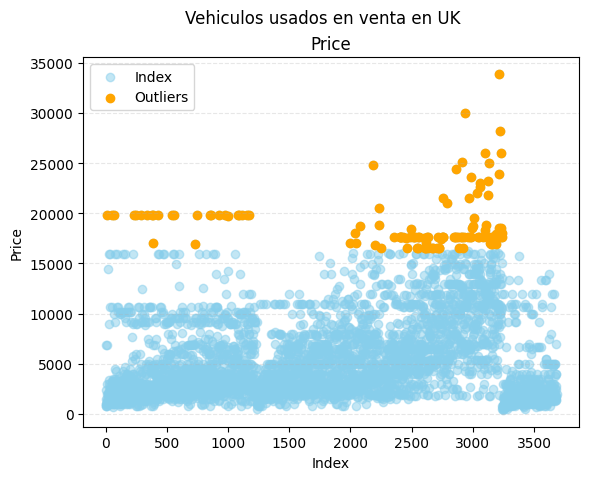

In [26]:
DispersionOutliers (Prices_dataset, "Price")

In [27]:
#identifico el mínimo para saber si no puede ser, en priemra instancia, un error 
ValorMinimo (Prices_dataset, "Price")

#identifico el máximo para saber si no puede ser, en priemra instancia, un error 
ValorMaximo (Prices_dataset, "Price")

El valor minimo es 400 y se encuentra en el indice [3243]
El valor maximo es 33900 y se encuentra en el indice [3210]


### **Mileage**

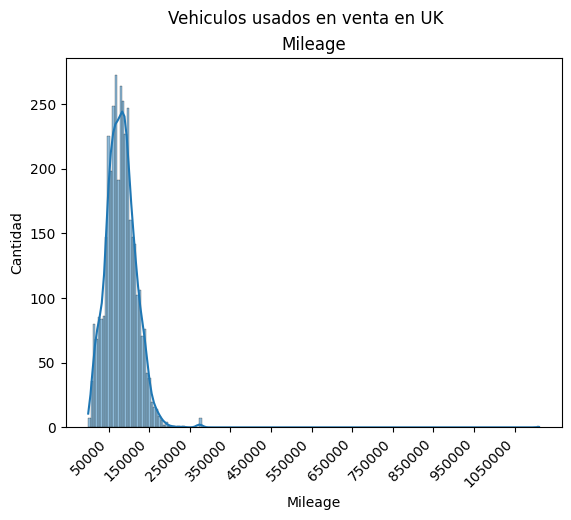

In [28]:
#analizo si el feature Mileage tiene outliers

sns.histplot(Prices_dataset["Mileage"], kde=True)

xtick_values = range(50000, 1110100, 100000)
        
plt.xlabel("Mileage")
        
plt.ylabel("Cantidad")

plt.suptitle ("Vehiculos usados en venta en UK")

plt.title ("Mileage")
        
plt.xticks(xtick_values, [str(val) for val in xtick_values], rotation=45, ha='right')

plt.show()

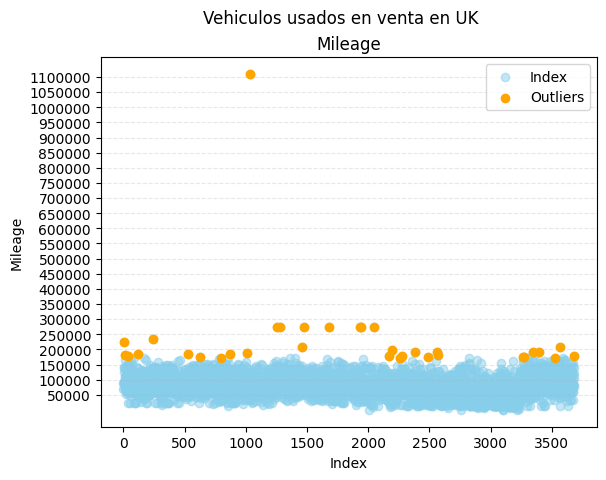

In [29]:
#Al encontrarse outliers voy a contrastarlos. Utilizo la funcion creada
DispersionOutliers (Prices_dataset, "Mileage")

In [30]:
ValorMaximo (Prices_dataset, "Mileage")

El valor maximo es 1110100 y se encuentra en el indice [1035]


In [31]:
Prices_dataset.loc[1035] #visualizo la fila completa del indice 1035 para observar sus otros valores

Price                        2495
Mileage                   1110100
Registration Year            2003
Previous Owners                 4
Fuel type                  Petrol
Body type               Hatchback
Engine                        2.0
Doors                           3
Seats                           4
Emission Class                  4
Service history Full            0
Gearbox Manual                  0
Name: 1035, dtype: object

+ Podemos considerar como hipotesis que el valor del outlier en id 1035 es un error factible de ser reemplazado por la mediana, teniendo en cuenta el año de registro (2003)

In [32]:
#reemplazo el valor extremo de la columna Mileage en indice 1035 por la mediana por considerarlo un error que distorsiona la muestra
medianaMileage = Prices_dataset ["Mileage"].median().astype(int) #calculo la mediana y lo convierto a int

Prices_dataset.loc[1035, "Mileage"] = medianaMileage #reemplazo el valor por la mediana

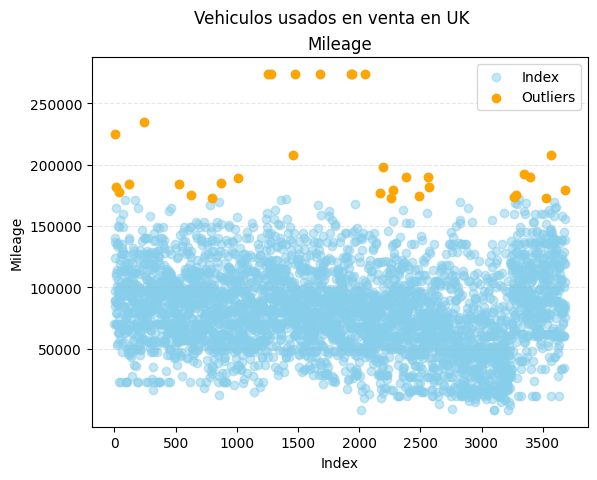

In [33]:
DispersionOutliers (Prices_dataset, "Mileage")

In [34]:
#vuelvo a visualizar la fila para asegurarme que los datos estan bien y aplico funcion int para los datos que en el paso anterior se convirtieron a float
Prices_dataset.loc[1035]

Price                        2495
Mileage                     80000
Registration Year            2003
Previous Owners                 4
Fuel type                  Petrol
Body type               Hatchback
Engine                        2.0
Doors                           3
Seats                           4
Emission Class                  4
Service history Full            0
Gearbox Manual                  0
Name: 1035, dtype: object

### **Registration Year**

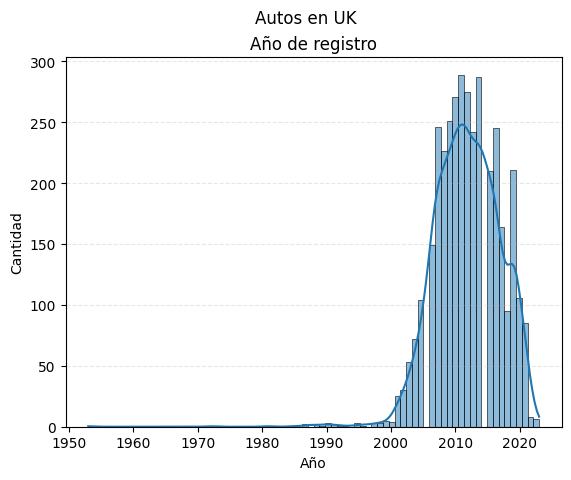

In [35]:
#al ser datos discretos podemos aplicar tambien histplot
sns.histplot (data=Prices_dataset ["Registration Year"], kde=True)
plt.suptitle('Autos en UK')
plt.title('Año de registro')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

+ Observamos que del universo total, la mayoria de los autos en venta en el Reino Unido no tienen mas de 23 años.

+ Ademas, una distribucion hacia la derecha con cola larga hacia la izquierda como indicativo de valores atípicos u outliers

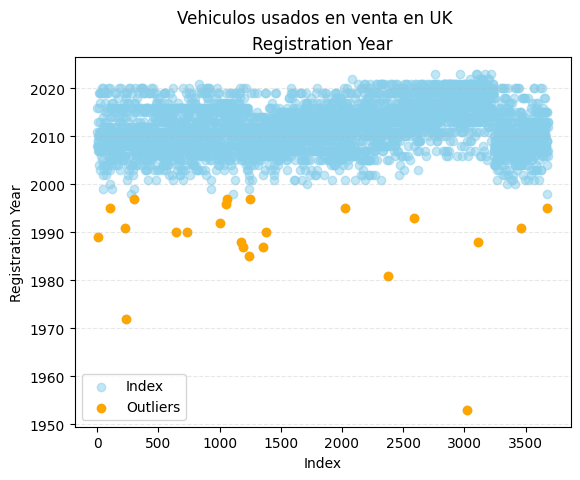

In [36]:
#visualización de outliers
DispersionOutliers (Prices_dataset, "Registration Year")

+ Observamos nuevamente una gran cantidad de outliers

In [37]:
ValorMinimo (Prices_dataset, "Registration Year")

El valor minimo es 1953 y se encuentra en el indice [3022]


In [38]:
Prices_dataset.loc[3022] #visualizo la fila para observar sus otros valores

Price                    14995
Mileage                  84000
Registration Year         1953
Previous Owners              3
Fuel type               Petrol
Body type               Saloon
Engine                     2.6
Doors                        4
Seats                        5
Emission Class               4
Service history Full         0
Gearbox Manual               1
Name: 3022, dtype: object

+ Podemos suponer que el valor 1953 no es ningun error, por lo que no debe ser reemplazado

### **Previous Owners**

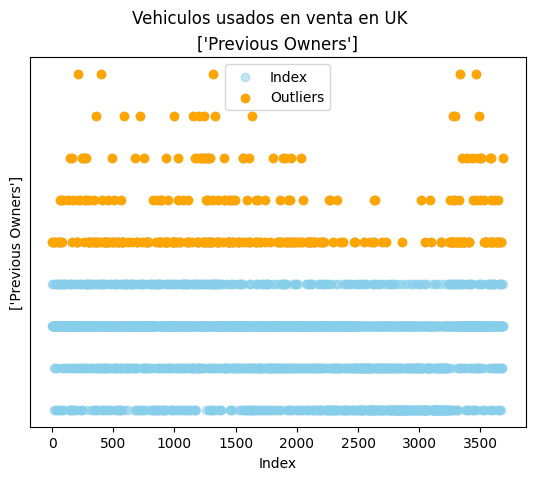

In [39]:
DispersionOutliers (Prices_dataset, ["Previous Owners"])

+ Observamos una gran cantidad de valores outliers en los cinco valores por encima del máximo (4)

### **Engine**

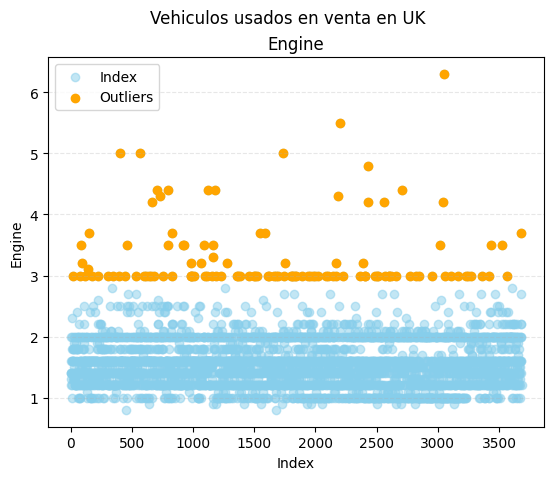

In [40]:
DispersionOutliers (Prices_dataset, "Engine")

+ Observamos nuevamente una gran cantidad de outliers

In [41]:
ValorMaximo (Prices_dataset, "Engine")

El valor maximo es 6.3 y se encuentra en el indice [3047]


In [42]:
Prices_dataset.loc [3047]

Price                    10850
Mileage                 107500
Registration Year         2007
Previous Owners              5
Fuel type               Petrol
Body type                  SUV
Engine                     6.3
Doors                        5
Seats                        5
Emission Class               4
Service history Full         0
Gearbox Manual               0
Name: 3047, dtype: object

### **Gearbox**

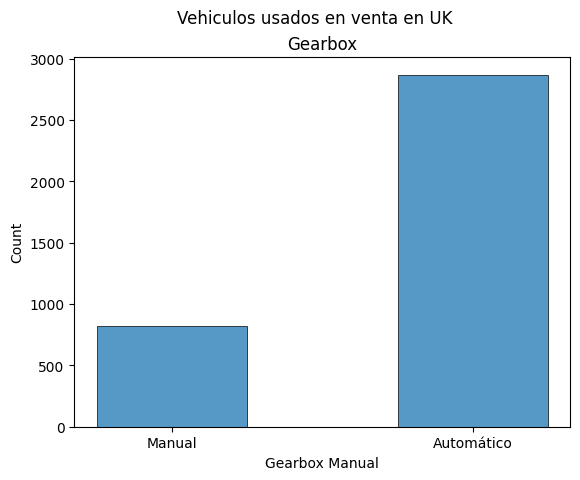

In [43]:
# a la hora de graficar este feature tuve la dificultad de que queria ejecutar un countplot o pie pero el gráfico representaba como si la columna tuviera miles de valores distintos cuando deberia ser solo 0 y 1
# por eso terminé utilizando histogram
sns.histplot (Prices_dataset ["Gearbox Manual"], bins=[-0.25, 0.25, 0.75, 1.25], linewidth=0.5)
plt.xticks(range(int(min(Prices_dataset["Gearbox Manual"])), int(max(Prices_dataset["Gearbox Manual"]))+1))
plt.suptitle ("Vehiculos usados en venta en UK")
plt.title ("Gearbox")
plt.xticks([0, 1], ['Manual', 'Automático'])
plt.show()

+ Observamos clases desbalaceadas en tanto que hay mas de 2500 autos Manual y aproximadamente 900 autos Automático

### **Doors**

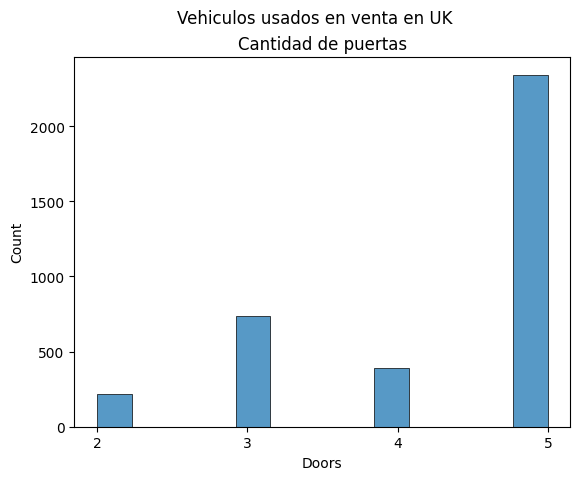

In [44]:
sns.histplot(Prices_dataset["Doors"], linewidth=0.5)
plt.xticks(range(int(min(Prices_dataset["Doors"])), int(max(Prices_dataset["Doors"]))+1))
plt.suptitle ("Vehiculos usados en venta en UK")
plt.title ("Cantidad de puertas")
plt.show()

+ Observamos clases desbalanceadas

### **Seats**

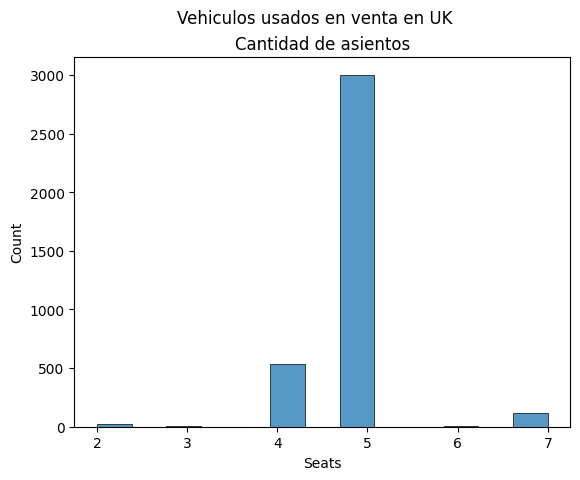

In [45]:
sns.histplot(Prices_dataset["Seats"], linewidth=0.5)
plt.xticks(range(int(min(Prices_dataset["Seats"])), int(max(Prices_dataset["Seats"]))+1))
plt.suptitle ("Vehiculos usados en venta en UK")
plt.title ("Cantidad de asientos")
plt.show()

+ Observamos clases desbalanceadas

### **Emission class**

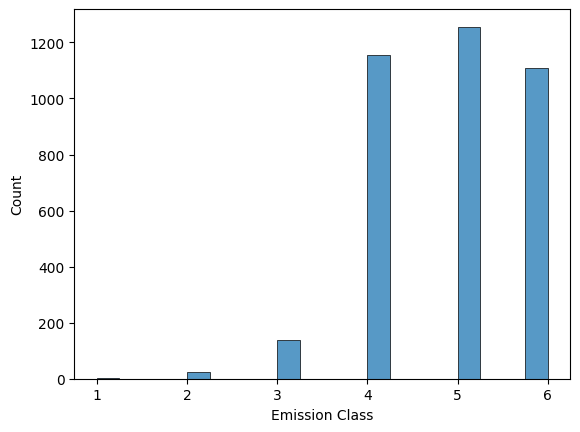

In [46]:
sns.histplot(Prices_dataset["Emission Class"], linewidth=0.5)
plt.xticks(range(int(min(Prices_dataset["Emission Class"])), int(max(Prices_dataset["Emission Class"]))+1))
plt.show()

+ Observamos clases desbalanceadas

### **Service history**

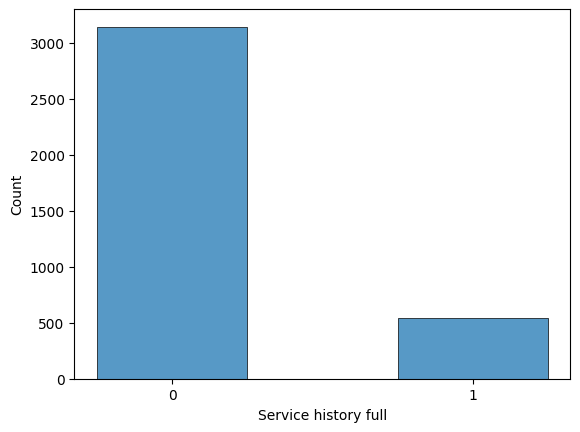

In [47]:
sns.histplot(Prices_dataset["Service history Full"], bins=[-0.25, 0.25, 0.75, 1.25], linewidth=0.5)
plt.xticks(range(int(min(Prices_dataset["Service history Full"])), int(max(Prices_dataset["Service history Full"]))+1))
plt.xlabel ("Service history full")
plt.show()

<div style="padding: 10px; text-align: center;">
 <h2 style="font-size: 1.4em; text-decoration: underline; ">Datos categóricos</h2>

### **Fuel type**

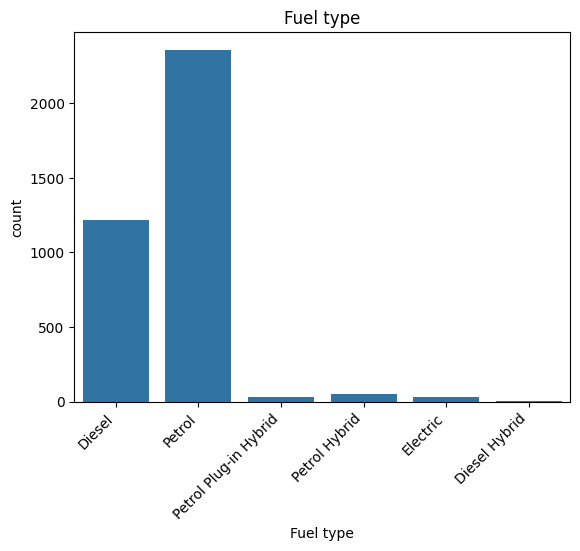

In [48]:
#al ser datos categóricos aplicamos countplot
sns.countplot (data= Prices_dataset, x='Fuel type')
plt.title ("Fuel type")
plt.xticks(rotation=45, ha='right')
plt.show()

> Observamos clases desbalanceadas

### **Body type**

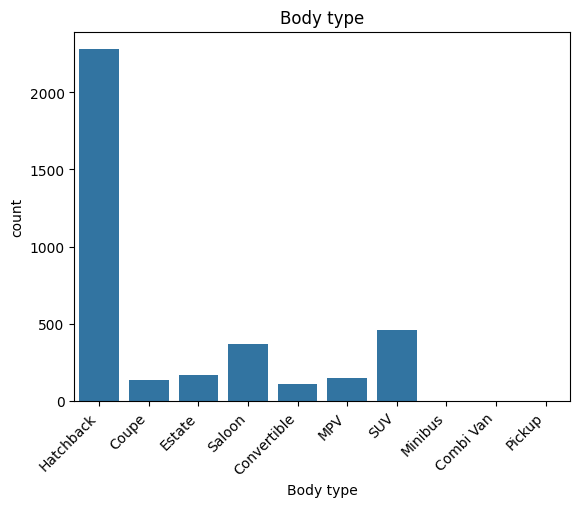

In [49]:
#al ser datos categóricos aplicamos countplot
sns.countplot (data= Prices_dataset, x='Body type')
plt.title ("Body type")
plt.xticks(rotation=45, ha='right')
plt.show()

> Observamos clases desbalanceadas

<div style="background-color: #FFD43B;padding: 10px; text-align: center;">
 <h2 style="color:#306998;font-size: 1.7em;">Correlaciones</h2>

In [50]:
#Aplico label encoder en los features con mas de dos datos categóricos (a pesar de no ser ordinales) para poder calcular relaciones entre variables
le = LabelEncoder()

fuelStr = Prices_dataset["Fuel type"]

fuelEncoded = le.fit_transform(fuelStr)

Prices_dataset["Fuel type"] = fuelEncoded

In [51]:
#Aplico label encoder en los features con mas de dos datos categóricos para poder calcular relaciones entre variables
le = LabelEncoder()

bodyStr = Prices_dataset["Body type"]

bodyEncoded = le.fit_transform(bodyStr)

Prices_dataset["Body type"] = bodyEncoded

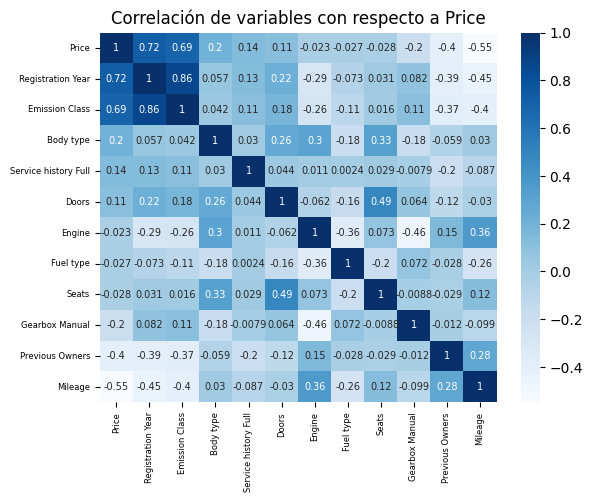

In [52]:
# Teniendo todos los features con valores discretos o continuos procedo a calcular correlaciones con el target value Price creando una funcion

# Defino la variable de correlacion del total del dataset
corr = Prices_dataset.corr() 

#La funcion llamada bestCoefficients se compone de varias acciones
def bestCoefficients(corr,k):

    cols = corr.nlargest(k, 'Price')['Price'].index #defino los features mas correlacionados con el target value

    cm = np.corrcoef (Prices_dataset[cols].values.T) #ordena de mayor correlacion a menor correlacion con respecto al target value
 
    sns.heatmap(cm, annot=True, cmap='Blues',annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values) #grafica el heatmap

    plt.title ("Correlación de variables con respecto a Price")
    
    plt.xticks(fontsize=6) #tamaño de fuente

    plt.yticks(fontsize=6)

    plt.show()

    return cols

cols = bestCoefficients(corr,12)

+ Podemos observar que la variable con mayor correlacion en nuestro dataset (Registration Year) con respecto a la variable objetivo Price tiene una correlacion alta, al igual que Emission Class.
 
+ Las variables Body type, Service history Full y Doors poseen una correlacion moderada con respecto a Price.

+ Las restantes variables tienen correlación negativa con nuestra variable objetivo, es decir, una relacion inversamente proporcional, en la que si una crece, la otra decrece.

+ Las variables con correlacion moderada o baja, con nuestro target value (Engine, Fuel type, Doors, Service history Full, Seats), podrian probar ser suprimidas para ver si mejora el desempeño del modelo de regresion lineal

<div style="background-color: #FFD43B;padding: 10px; text-align: center;">
 <h2 style="color:#306998;font-size: 1.7em;">Regresión lineal multiple</h2>

### **Regresión lineal - sklearn**

In [53]:
#entreno modelo de regresion multiple

X= Prices_dataset.drop (columns="Price")

y= Prices_dataset ["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7) #divido por subconjuntos de entranamiento y test con una semilla de aleatoriedad de 7 y un estandar de estratificacion de 70-30

model = LinearRegression ()

model.fit(X_train, y_train) #crear recta a partir de estos dos subconjuntos que se validará con X_test e y_test


LinearRegression()

In [54]:
print ("Coeficientes: ", model.coef_) #representa coef asociado a cada feature. Es la inclinacion de cada plano en un hiperplano
print ("Ordenada al origen: ", model.intercept_)

Coeficientes:  [-3.87543710e-02  4.67459238e+02 -2.79602406e+02  9.40949612e+01
  1.92886937e+02  1.85527501e+03 -1.24430495e+02 -2.48992191e+02
  8.26384874e+02 -2.57826299e+01 -1.98940054e+03]
Ordenada al origen:  -935563.2746290171


In [55]:
#visualizo coeficientes mediante DataFrame
pd.DataFrame({'Coeficientes': model.coef_}, index=Prices_dataset.drop(columns="Price").columns)

,Coeficientes
Mileage,-0.038754
Registration Year,467.459238
Previous Owners,-279.602406
Fuel type,94.094961
Body type,192.886937
Engine,1855.275013
Doors,-124.430495
Seats,-248.992191
Emission Class,826.384874
Service history Full,-25.782630


+ Los coeficientes calculados son altos

In [56]:
#realizo predicciones con subconjuntos test con los datos train
y_pred = model.predict (X_test)

mse= mean_squared_error(y_pred, y_test) #regulariza, penaliza errores grandes y favoreciendo que el modelo incorpore valores chicos 

r2= r2_score(y_pred, y_test) #permite comparar modelos entre si. cuanta varianza en la variable dependiente se explica por las variables independientes. Penaliza al modelo cuantos mas features tenga

print("El MSE es:", mse) 
print ("El R2 ajustado es:", r2)

El MSE es: 6095130.366148931
El R2 ajustado es: 0.6202201804099224


+ El MSE es un numero bastante alto, el cual conviene calcularle la raiz mediante root mean square error
+ El 62% de la varianza es explicada por los features en relacion al target value Price

In [57]:
# Al dar un MSE tan grande, quiero visualizar el root mean square error
print ("El RMSE es :", np.sqrt (mse)) 

El RMSE es : 2468.8317816629246


### **Backward elimination**

In [58]:
#entreno modelo de regresion multiple dejando de lado los features Engine, Fuel type, Doors, Service history Full, Seats
columnsDrop = ["Price", "Engine", "Fuel type", "Doors", "Service history Full","Seats"]

X= Prices_dataset.drop (columns=columnsDrop)

y= Prices_dataset ["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7) #divido por subconjuntos de entranamiento y test con una semilla de aleatoriedad de 7 y un estandar de estratificacion de 70-30

model = LinearRegression ()

model.fit(X_train, y_train)

y_pred = model.predict (X_test)

mse= mean_squared_error(y_pred, y_test) #regulariza, penaliza errores grandes y favoreciendo que el modelo incorpore valores chicos 

r2= r2_score(y_pred, y_test) #permite comparar modelos entre si. cuanta varianza en la variable dependiente se explica por las variables independientes. Penaliza al modelo cuantos mas features tenga

print("El MSE es:", mse) 
print ("El R2 ajustado es:", r2)


El MSE es: 6313566.789112374
El R2 ajustado es: 0.5969878322247546


+ En este caso, eliminar las variables con poca correlación con el target Value Price redujeron el R2 y aumentaron el MSE, por lo que es necesario contener los features en el modelo

### **Statsmodel**
#### Prueba

In [59]:
#Por ultimo podemos utilizar la libreria statsmodels para calcular kurtosis, asimetria y otras estadisticas
y2 = Prices_dataset ["Price"]

X2 = Prices_dataset.drop(columns=["Price"])

X2 = sm.add_constant(X2) #adhiero columna de intercepto

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.7, random_state=8)

#creo modelo de regresion
modelo= sm.OLS(y_train, X_train) #regresion lineal ordinaria

#ajusto el modelo y lo imprimo
resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     284.3
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          2.36e-311
Time:                        18:48:45   Log-Likelihood:                -10095.
No. Observations:                1105   AIC:                         2.021e+04
Df Residuals:                    1093   BIC:                         2.027e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.001e+05 

+ La asimetría (skew) de 1.540 nos está indicando que los datos estan sesgados hacia la derecha con respecto a la media. Hay una distribución asimetrica hacia la derecha
+ La kurtosis de 9929 nos indica una distribución con colas muy pesadas producto de outliers extremos

### Conclusión:
+ El modelo generado no es totalmente capaz de explicar la relacion lineal entre las variables. Las hipotesis de regresion (relacion lineal, multicolinealidad, normalidad y varianzas iguales) no se cumplen del todo
+ Utilizando la libreria sklearn y entrenando el modelo, el 62% de la varianza es explicada por los features en relacion al target value Price
+ Utilizando la libreria statsmodels, entrenando el modelo e incluyendo un intercepto notamos que el R2 varia en 12 puntos, indicando que el 74% de la varianza es explicada por los features en relacion al target value Price